<h1><center>Cancer prevention & Prediction System Using Machine Learning</center></h1>

## The problem statement is that we need to predict those people who are prone to have Cancer Disease with respect to different parameters such as their `Age`, `Gender`, `Alcohol Use`, `Obesity`, `Genetic Risk` , `Smoking`, `Dust Allergy`and `Air Pollution`.

## Importing useful Libraries and dataset

In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use("seaborn-whitegrid")

In [5]:
from sklearn.feature_selection import SelectKBest #Feature Selector
from sklearn.feature_selection import f_classif #F-ratio statistic for categorical values

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


* **There is also imbalance in data, so let's see how we train and predict with this dataset.**

In [7]:
# Importing our Dataset

cancer_patient = pd.read_csv("/content/drive/MyDrive/PFE_IPS/final_code/cancer patient data sets.csv")

In [8]:
cancer_patient['Alcohol use'].max()

8

In [9]:
len(cancer_patient)

1000

In [10]:
cancer_patient.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards      1000 non-null   int64 
 7   Genetic Risk              1000 non-null   int64 
 8   chronic Lung Disease      1000 non-null   int64 
 9   Balanced Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive Smoker            1000 non-null   int64 
 13  Chest Pain                1000 non-null   int64 
 14  Coughing of Blood        

### Data is already clean, no null values so let's analyse further

In [11]:
cancer_patient.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,37.174,12.005493,14.0,27.75,36.0,45.0,73.0
Gender,1000.0,1.402,0.490547,1.0,1.00,1.0,2.0,2.0
Air Pollution,1000.0,3.840,2.030400,1.0,2.00,3.0,6.0,8.0
Alcohol use,1000.0,4.563,2.620477,1.0,2.00,5.0,7.0,8.0
Dust Allergy,1000.0,5.165,1.980833,1.0,4.00,6.0,7.0,8.0
OccuPational Hazards,1000.0,4.840,2.107805,1.0,3.00,5.0,7.0,8.0
Genetic Risk,1000.0,4.580,2.126999,1.0,2.00,5.0,7.0,7.0
chronic Lung Disease,1000.0,4.380,1.848518,1.0,3.00,4.0,6.0,7.0
Balanced Diet,1000.0,4.491,2.135528,1.0,2.00,4.0,7.0,7.0
Obesity,1000.0,4.465,2.124921,1.0,3.00,4.0,7.0,7.0


In [12]:
df=cancer_patient


In [13]:
#df.drop(df.iloc[:, 13:21], axis = 1, inplace = True)

In [14]:
#df.drop(df.columns[[0,5, 6,8,9,13,14,15]], axis = 1, inplace = True)

In [15]:
#df.head()

In [16]:
#fig = plt.figure(figsize = (13,8))
#sns.heatmap(df.corr(),cmap='coolwarm',annot=True);

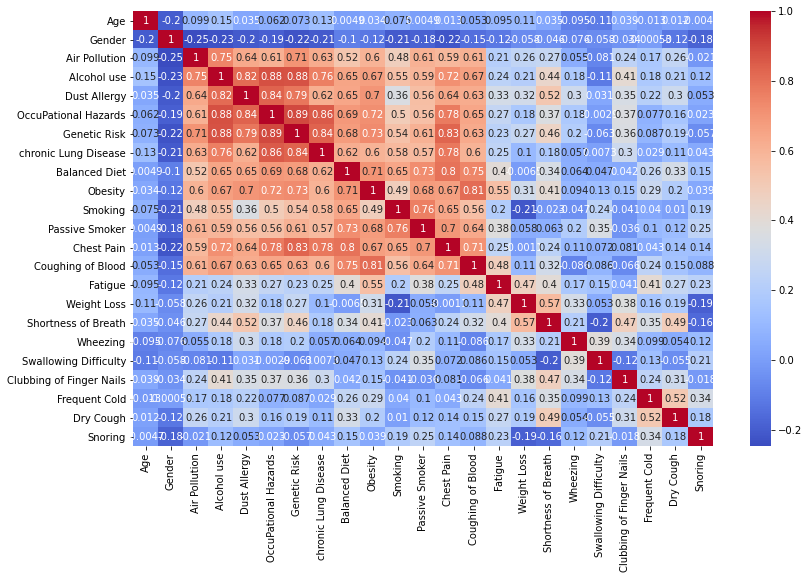

In [17]:
fig = plt.figure(figsize = (13,8))
sns.heatmap(cancer_patient.corr(),cmap='coolwarm',annot=True);
plt.savefig("/content/drive/MyDrive/PFE_IPS/matrix.png")

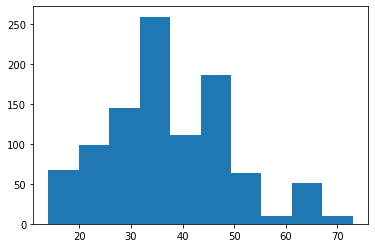

In [18]:
fig, ax = plt.subplots()
hist = ax.hist(x = cancer_patient["Age"]);


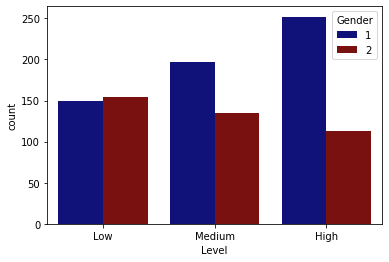

In [19]:
#Required outside of function. This needs to be activated first when plotting in every code block
fig, ax = plt.subplots()

#Count plot
plot = sns.countplot(data = cancer_patient, x='Level', hue='Gender', palette=['darkblue','darkred'])
plt.savefig("/content/drive/MyDrive/PFE_IPS/values_gender.png")

In [20]:
cancer_patient.columns

Index(['Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

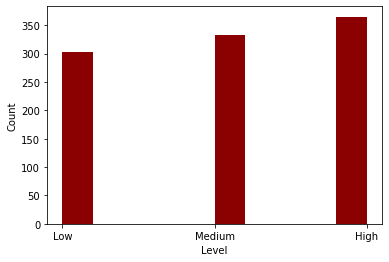

In [21]:
fig, ax = plt.subplots()

histt = ax.hist(x = cancer_patient["Level"], bins = 10, color ='darkred')

ax.set(xlabel = "Level", ylabel = "Count");

In [22]:
import plotly.graph_objs as go

labels = cancer_patient['Level'].value_counts()[:].index
values = cancer_patient['Level'].value_counts()[:].values

colors=['#2678bf', '#98adbf']

trace1 = go.Pie(labels=labels, values=values,
              textinfo='label+percent', 
               
               marker=dict(colors=colors 
                           ),

               )
fig=go.Figure(data=[trace1])

fig.show()

### As we can see `Level` dtype is not int so first we replace it with numbers then into type int

In [23]:
cancer_patient["Level"].replace(["Low", "Medium", "High"], ["0", "1", "2"], inplace=True)

In [24]:
cancer_patient["Level"] = cancer_patient["Level"].astype(int)

In [25]:
cancer_patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards      1000 non-null   int64 
 7   Genetic Risk              1000 non-null   int64 
 8   chronic Lung Disease      1000 non-null   int64 
 9   Balanced Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive Smoker            1000 non-null   int64 
 13  Chest Pain                1000 non-null   int64 
 14  Coughing of Blood        

#### Above entire data is in `int`

Feature Selection

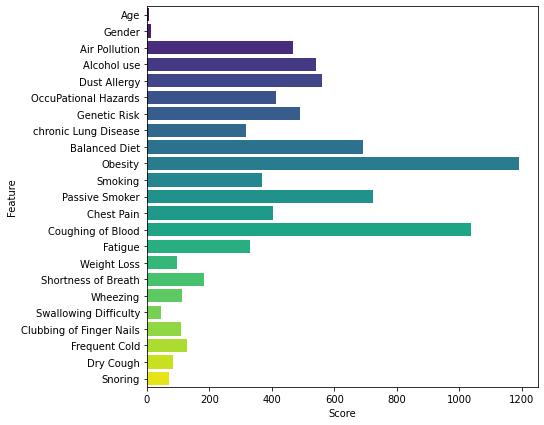

In [26]:
X=cancer_patient.drop(['Level','Patient Id'], axis=1)
Y=cancer_patient['Level']
bestfeatures = SelectKBest(score_func=f_classif, k='all')
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns

#Visualize the feature scores
fig, ax=plt.subplots(figsize=(7,7))
plot=sns.barplot(data=featureScores, x='Score', y='Feature', palette='viridis',linewidth=0.5, saturation=2, orient='h')
plt.savefig("/content/drive/MyDrive/PFE_IPS/import_factors.png")
plot

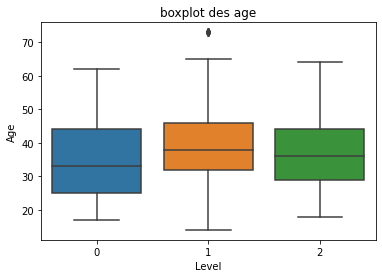

In [27]:
import seaborn as sns

ax = sns.boxplot(y="Age", x="Level", data=cancer_patient) ; #plt.show() 

# Si on inverse x et y, les barres deviennent horizontales
plt.title("boxplot des age")
plt.savefig("squares.png")
plt.show()



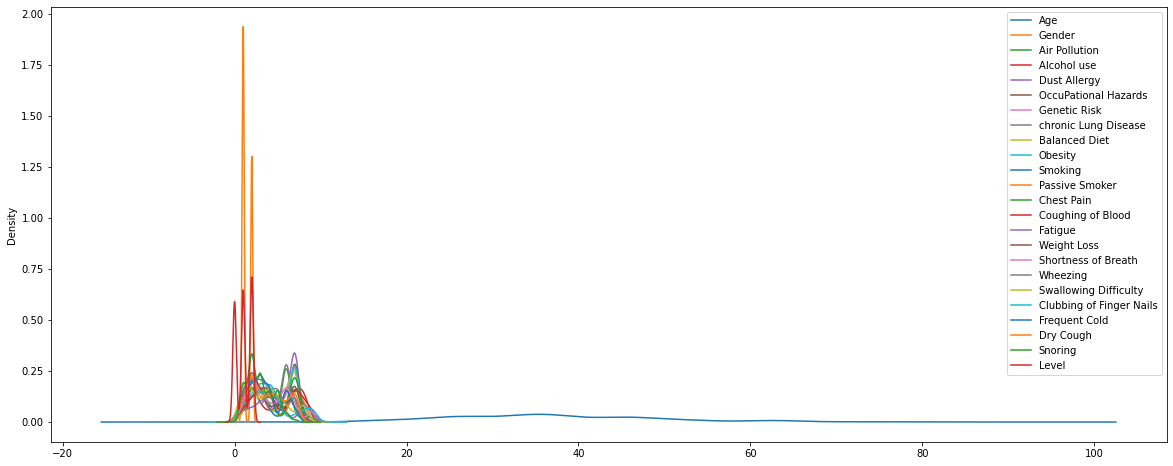

In [28]:
cancer_patient.plot.kde(figsize = (20,8));

## Les risques Factor 
{Air Pollution,Alcohol},{Genetic Risk,Obesity}		{Dust Allergy,Alcohol}{chronic Lung Disease,Genetic}

**Plotting with respect to `Age` and `Genetic Risk`**

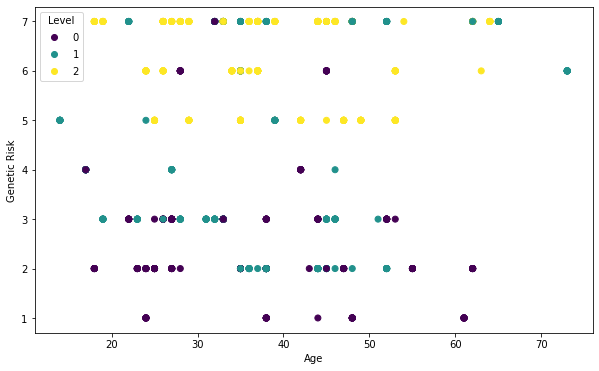

In [29]:
fig, ax = plt.subplots(figsize = (10, 6));

scatter = ax.scatter(x = cancer_patient["Age"], 
                     y = cancer_patient["Genetic Risk"],
                     c = cancer_patient["Level"],
                     cmap = "viridis")

ax.set(xlabel = "Age", 
       ylabel = "Genetic Risk");

ax.legend(*scatter.legend_elements(), title = "Level");
plt.savefig("/content/drive/MyDrive/PFE_IPS/Genetic_age.png")


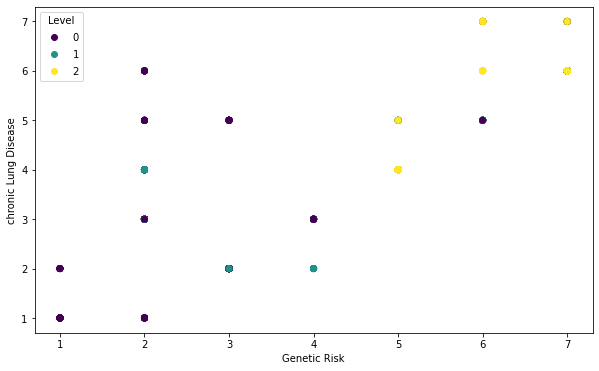

In [30]:

fig, ax = plt.subplots(figsize = (10, 6));

scatter = ax.scatter(y = cancer_patient["chronic Lung Disease"], 
                     x = cancer_patient["Genetic Risk"],
                     c = cancer_patient["Level"],
                     cmap = "viridis")

ax.set(ylabel = "chronic Lung Disease", 
       xlabel = "Genetic Risk");

ax.legend(*scatter.legend_elements(), title = "Level");
plt.savefig("/content/drive/MyDrive/PFE_IPS/Disease_Genetic.png")


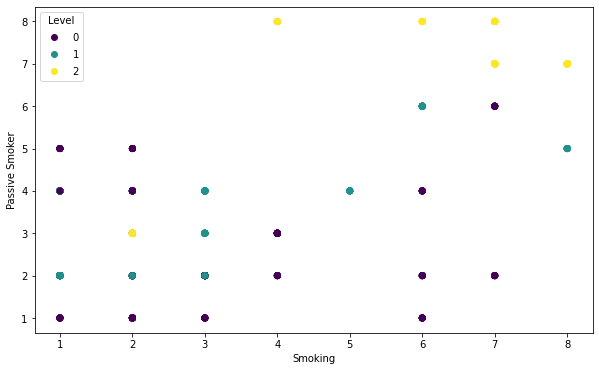

In [31]:
fig, ax = plt.subplots(figsize = (10, 6));

scatter = ax.scatter(y = cancer_patient["Passive Smoker"], 
                     x = cancer_patient["Smoking"],
                     c = cancer_patient["Level"],
                     cmap = "viridis")

ax.set(ylabel = "Passive Smoker", 
       xlabel = "Smoking");

ax.legend(*scatter.legend_elements(), title = "Level");
plt.savefig("/content/drive/MyDrive/PFE_IPS/Passive_Smok.png")


In [32]:
np.array([cancer_patient["Gender"][:10]])

array([[1, 1, 1, 1, 1, 1, 2, 2, 2, 1]])

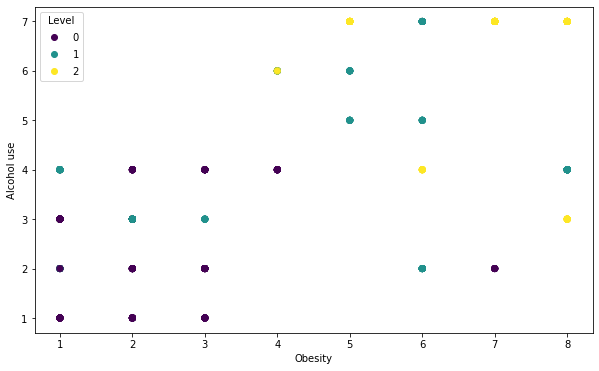

In [33]:
fig, ax = plt.subplots(figsize = (10, 6))
scatter = ax.scatter(x = cancer_patient["Alcohol use"], y = cancer_patient["Obesity"],
                     c = cancer_patient["Level"],
                     cmap='viridis');
ax.set(ylabel = "Alcohol use", 
       xlabel = "Obesity");

ax.legend(*scatter.legend_elements(), title = "Level");
plt.savefig("/content/drive/MyDrive/PFE_IPS/Alcohol_Obesity.png")
#ax.axhline(cancer_patient["Level"].mean(),);

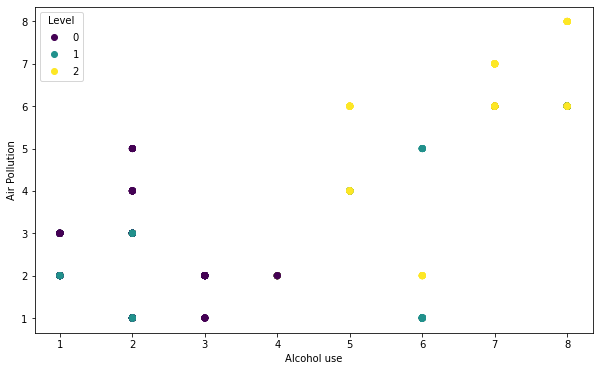

In [34]:
fig, ax = plt.subplots(figsize = (10, 6))
scatter = ax.scatter(x = cancer_patient["Alcohol use"], 
                     y = cancer_patient["Air Pollution"], 
                     c = cancer_patient["Level"], 
                     cmap='viridis'
                     )

ax.set(xlabel = "Alcohol use", 
       ylabel = "Air Pollution");

ax.legend(*scatter.legend_elements(), title = "Level");
plt.savefig("/content/drive/MyDrive/PFE_IPS/Air_Pollu_Alcohol.png")

#ax.axhline(cancer_patient["Level"].mean(),
 #          linestyle = "--");

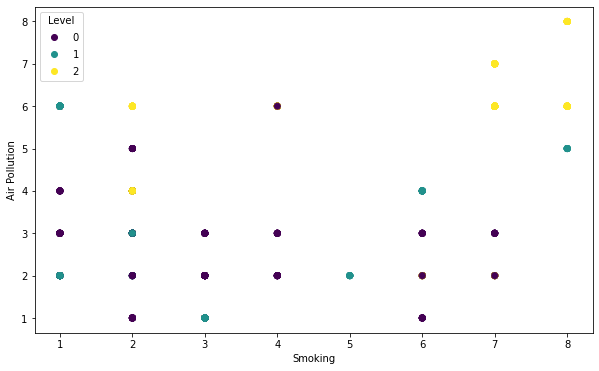

In [35]:
fig, ax = plt.subplots(figsize = (10, 6))
scatter = ax.scatter(x = cancer_patient["Smoking"], 
                     y = cancer_patient["Air Pollution"], 
                     c = cancer_patient["Level"], 
                     cmap='viridis'
                     )

ax.set(xlabel = "Smoking", 
       ylabel = "Air Pollution");

ax.legend(*scatter.legend_elements(), title = "Level");
plt.savefig("/content/drive/MyDrive/PFE_IPS/Air_Pollu_Smok.png")

#ax.axhline(cancer_patient["Level"].mean(),
 #          linestyle = "--");

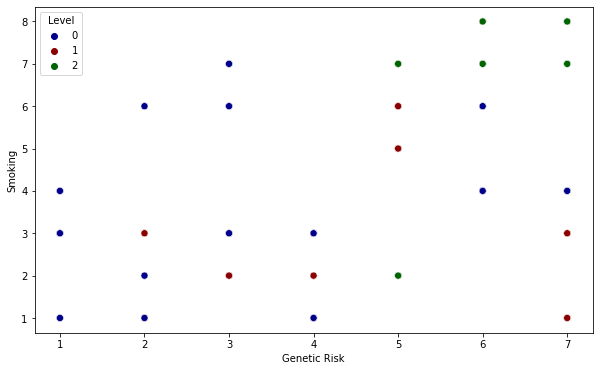

In [36]:
fig, ax=plt.subplots(figsize = (10, 6))#Required outside of function. This needs to be activated first when plotting in every code block
plot=sns.scatterplot(data=cancer_patient, 
                     x='Genetic Risk',
                     y='Smoking', 
                     hue='Level', 
                     palette=['darkblue','darkred','darkgreen'], 
                     s=50, 
                     marker='o')#Count plot
plt.savefig("/content/drive/MyDrive/PFE_IPS/Genetic_Smok.png")
                    

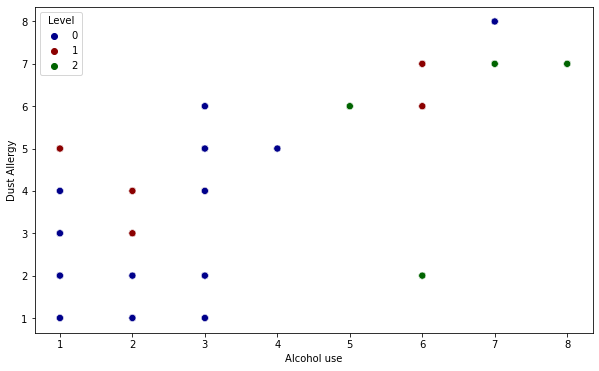

In [37]:

fig, ax=plt.subplots(figsize = (10, 6))#Required outside of function. This needs to be activated first when plotting in every code block
plot=sns.scatterplot(data=cancer_patient, 
                     x='Alcohol use',
                     y='Dust Allergy', 
                     hue='Level', 
                     palette=['darkblue','darkred','darkgreen'], 
                     s=50, 
                     marker='o')#Count plot
plt.savefig("/content/drive/MyDrive/PFE_IPS/Alcohol_Dust.png")
                    

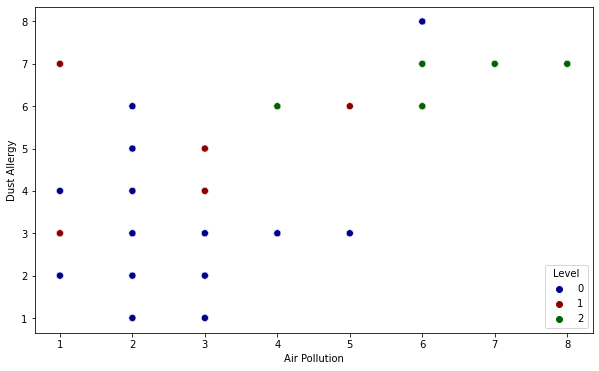

In [38]:

fig, ax=plt.subplots(figsize = (10, 6))#Required outside of function. This needs to be activated first when plotting in every code block
plot=sns.scatterplot(data=cancer_patient, 
                     x='Air Pollution',
                     y='Dust Allergy', 
                     hue='Level', 
                     palette=['darkblue','darkred','darkgreen'], 
                     s=50, 
                     marker='o')#Count plot
plt.savefig("/content/drive/MyDrive/PFE_IPS/Air_Dust.png")

**Number of `Male` & `Females`**

In [39]:
male = 0
female = 0
for i in cancer_patient["Gender"]:
    if i == 1:
        male += 1
    elif i == 2:
        female += 1
f"Number of Male: {male}, Number of females: {female}"

'Number of Male: 598, Number of females: 402'

In [40]:
# Make a histogram here
cancer_patient_male = cancer_patient[cancer_patient["Gender"] == 1]
cancer_patient_male.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,3,1,2,3,4,0
1,P10,17,1,3,1,5,3,4,2,2,2,2,4,2,3,1,3,7,8,6,2,1,7,2,1
2,P100,35,1,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2,2
3,P1000,37,1,7,7,7,7,6,7,7,7,7,7,7,8,4,2,3,1,4,5,6,7,5,2
4,P101,46,1,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3,2


In [41]:
cancer_patient_female = cancer_patient[cancer_patient["Gender"] == 2]
cancer_patient_female.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
6,P103,52,2,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,3,1,2,3,4,0
7,P104,28,2,3,1,4,3,2,3,4,3,1,4,3,1,3,2,2,4,2,2,3,4,3,0
8,P105,35,2,4,5,6,5,6,5,5,5,6,6,6,5,1,4,3,2,4,6,2,4,1,1
11,P108,64,2,6,8,7,7,7,6,7,7,7,8,7,7,9,6,5,7,2,4,3,1,4,2
12,P109,39,2,4,5,6,6,5,4,6,6,6,6,6,6,5,3,2,4,3,1,7,5,6,1


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



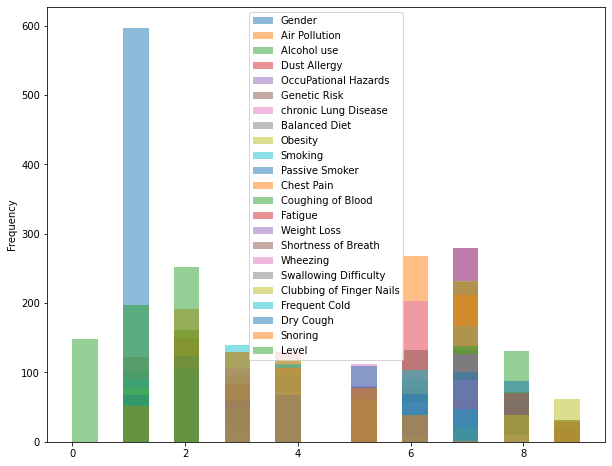

In [42]:
cancer_patient_male.drop(columns='Age',inplace=True,index=0)
cancer_patient_male.plot.hist(figsize=(10,8),bins=20, alpha=0.5)

In [43]:
cancer_patient_male.drop(["Patient Id"], axis = 1, inplace= True)
#plt.hist(cancer_patient_male);

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [44]:
#plt.hist(cancer_patient_female);

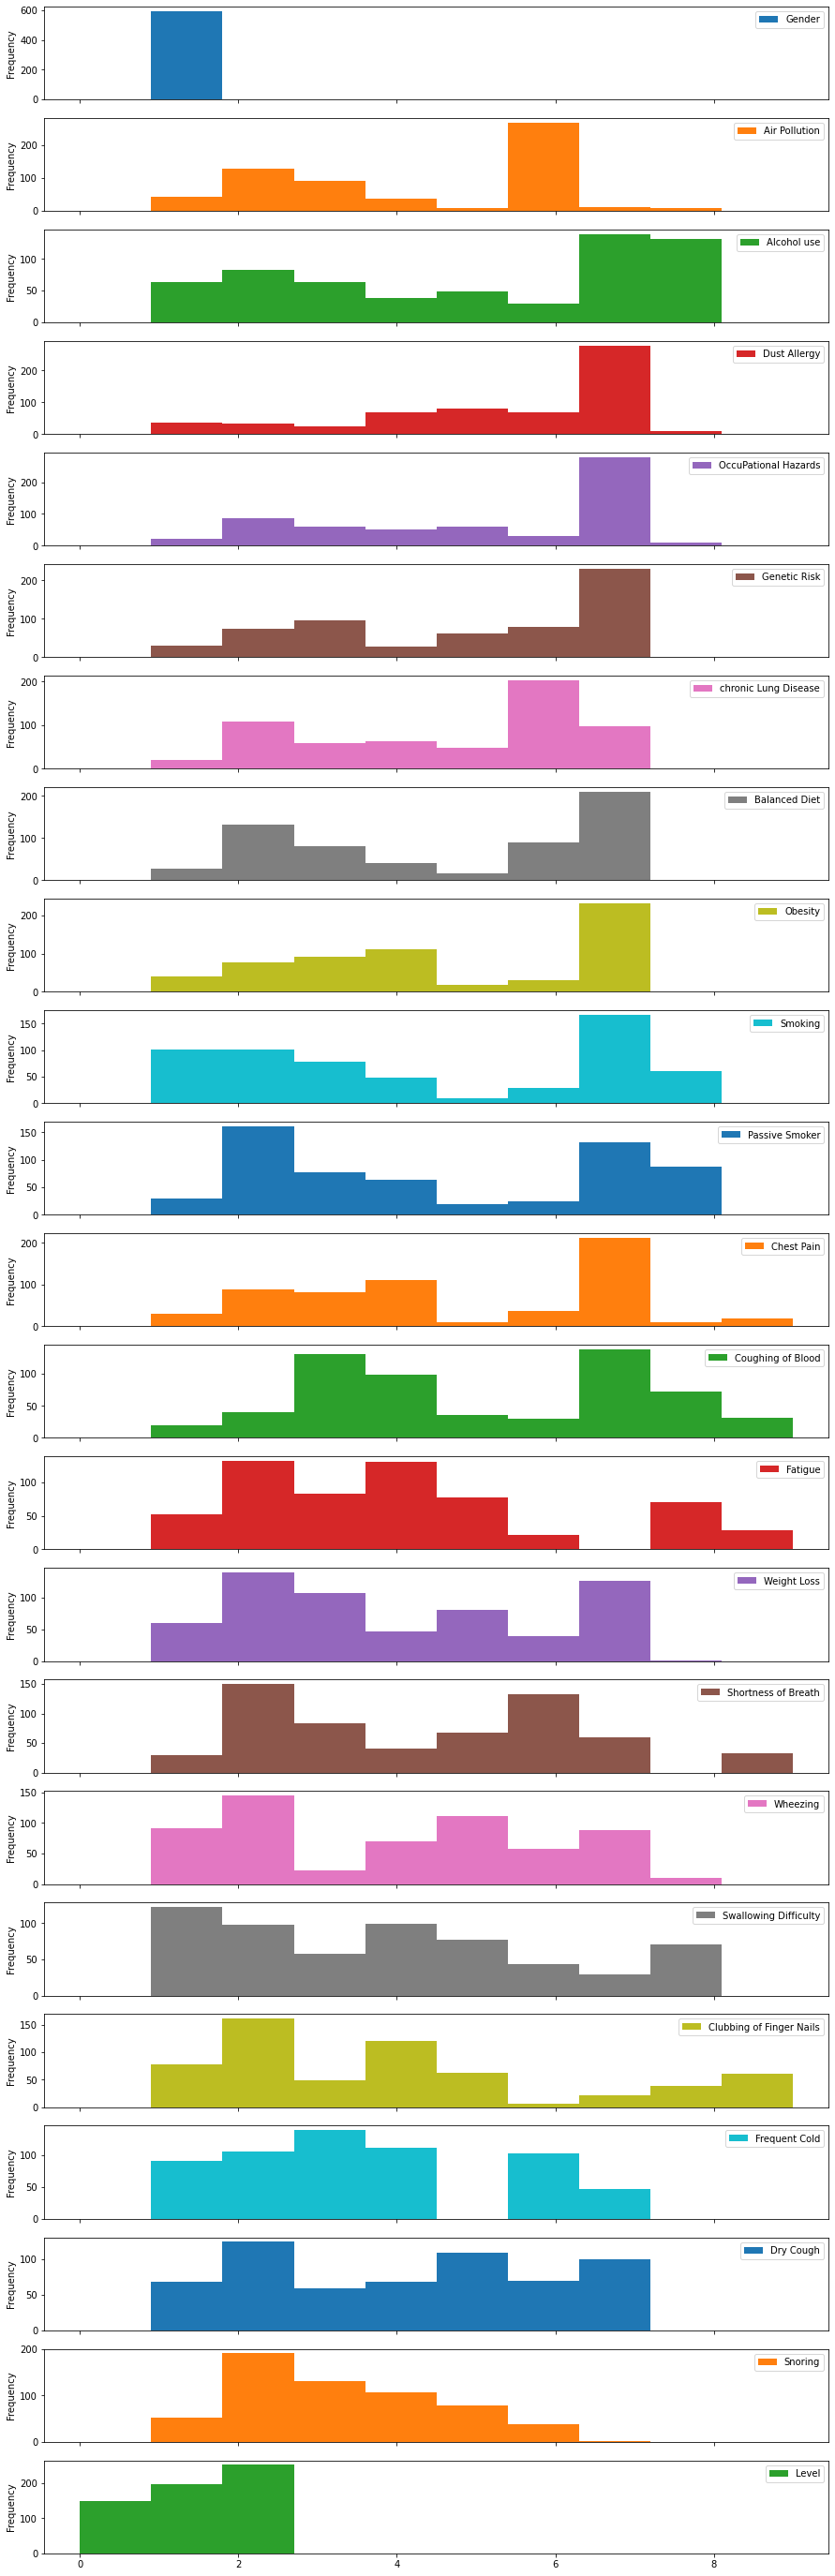

In [45]:
cancer_patient_male.plot.hist(figsize = (15, 50), subplots = True);

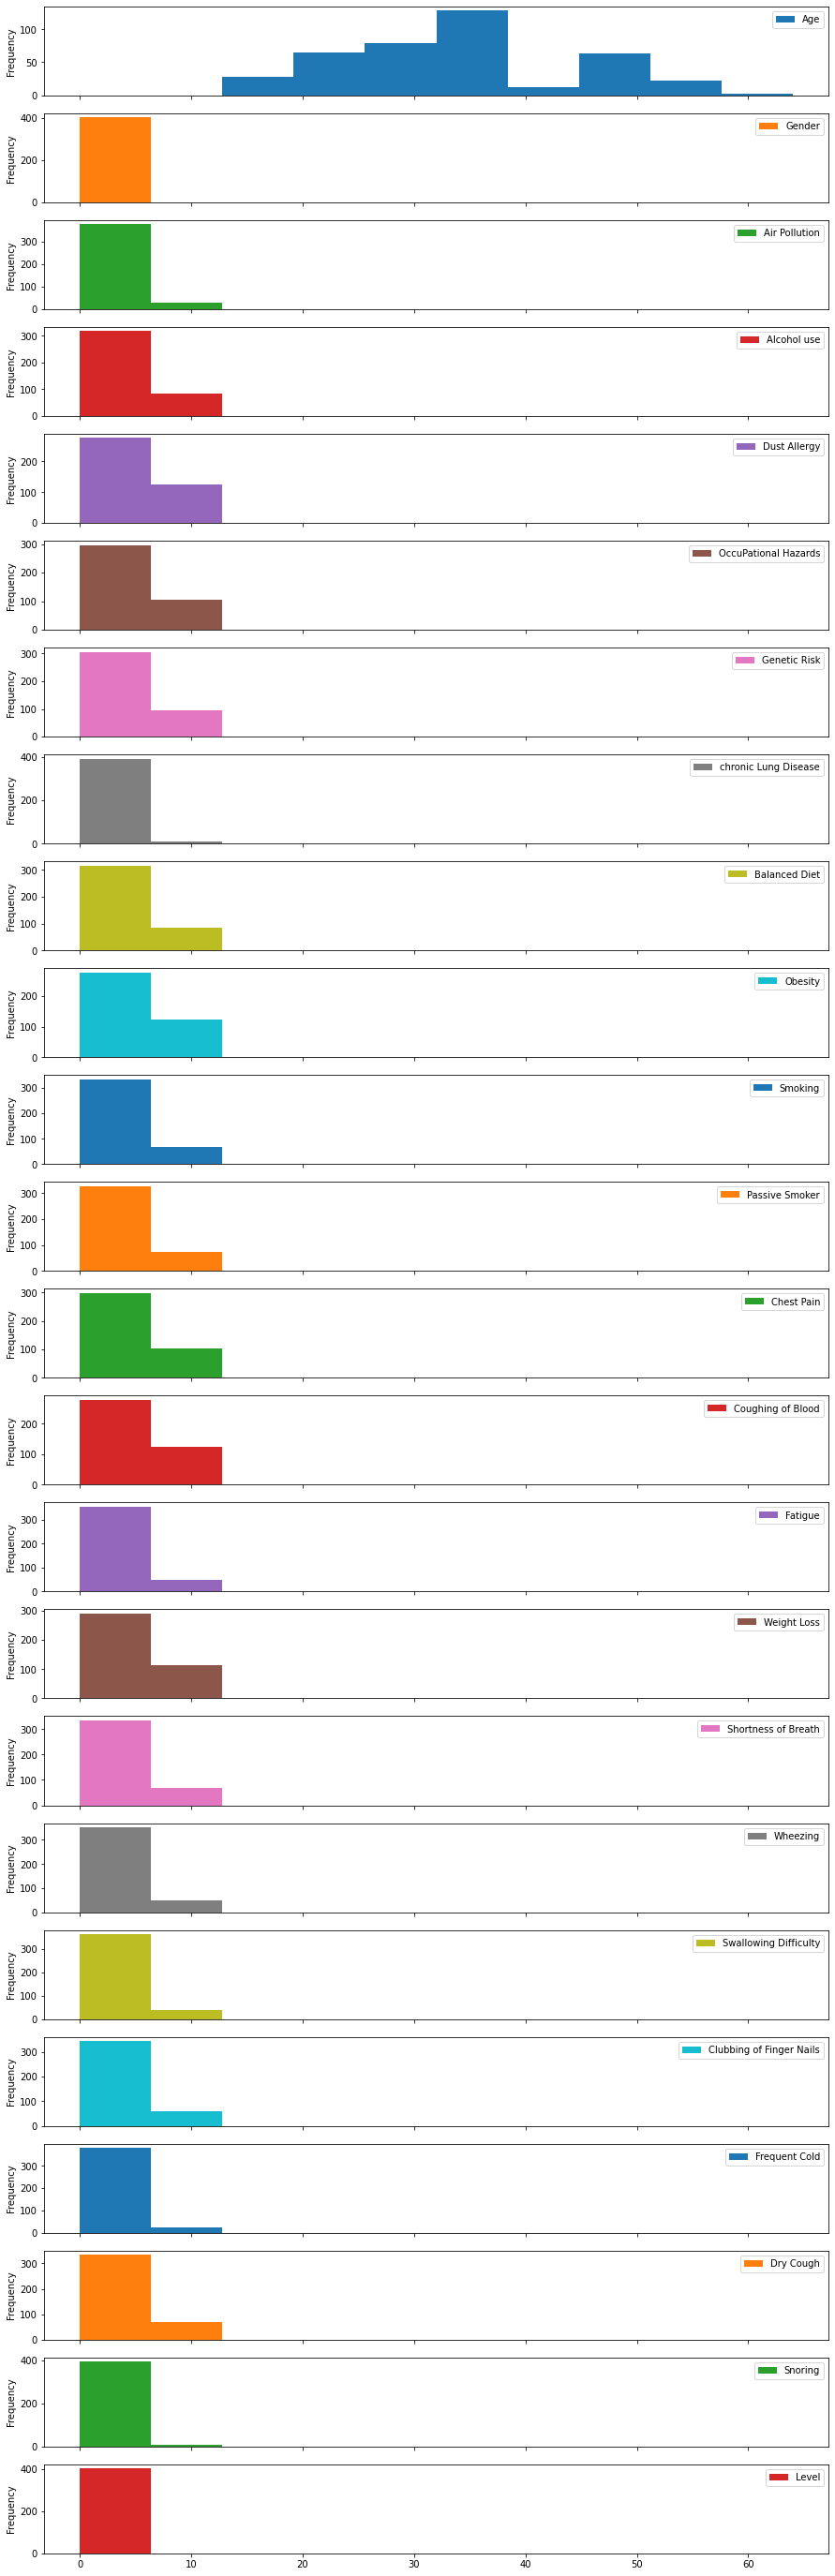

In [46]:
cancer_patient_female.plot.hist(figsize = (15, 50), subplots = True);

In [47]:
#fig, ax = plt.subplots()
#cancer_patient_male.plot(kind = "bar", x = "Genetic Risk", y = "Smoking", ax = ax);

In [48]:
len(cancer_patient_male), len(cancer_patient_female)

(597, 402)

In [49]:
cancer_patient.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,3,1,2,3,4,0
1,P10,17,1,3,1,5,3,4,2,2,2,2,4,2,3,1,3,7,8,6,2,1,7,2,1
2,P100,35,1,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2,2
3,P1000,37,1,7,7,7,7,6,7,7,7,7,7,7,8,4,2,3,1,4,5,6,7,5,2
4,P101,46,1,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3,2


In [50]:
#fig, ax = plt.subplots()
#cancer_patient.plot(kind = "bar", x = "Gender", y = "Age", ax = ax);

==> peut être utiliser les autres factures 

## lung cancer symptoms 

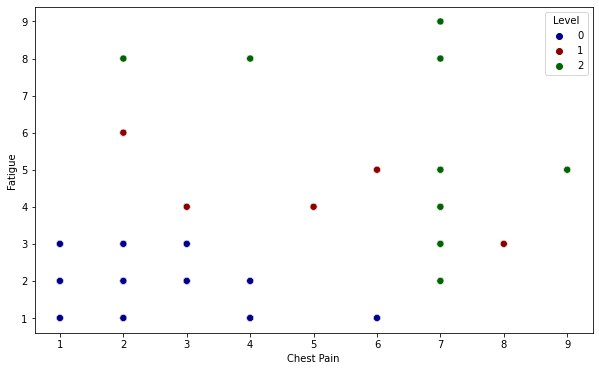

In [51]:
fig, ax=plt.subplots(figsize = (10, 6))#Required outside of function. This needs to be activated first when plotting in every code block
plot=sns.scatterplot(data=cancer_patient, 
                     x='Chest Pain',
                     y='Fatigue', 
                     hue='Level', 
                     palette=['darkblue','darkred','darkgreen'], 
                     s=50, 
                     marker='o')#Count plot
plt.savefig("/content/drive/MyDrive/PFE_IPS/Pain_Fatigue.png")


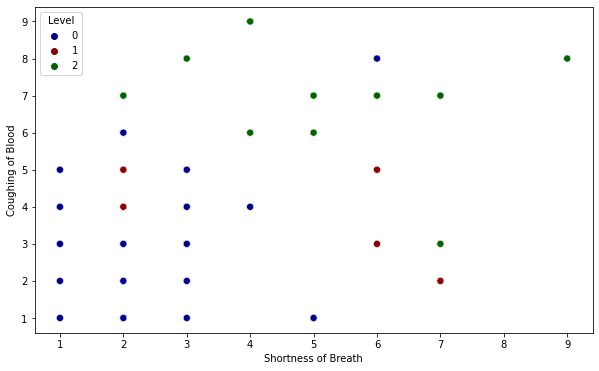

In [52]:
fig, ax=plt.subplots(figsize = (10, 6))#Required outside of function. This needs to be activated first when plotting in every code block
plot=sns.scatterplot(data=cancer_patient, 
                     x='Shortness of Breath',
                     y='Coughing of Blood', 
                     hue='Level', 
                     palette=['darkblue','darkred','darkgreen'], 
                     s=50, 
                     marker='o')#Count plot
plt.savefig("/content/drive/MyDrive/PFE_IPS/Blood_Breath.png")

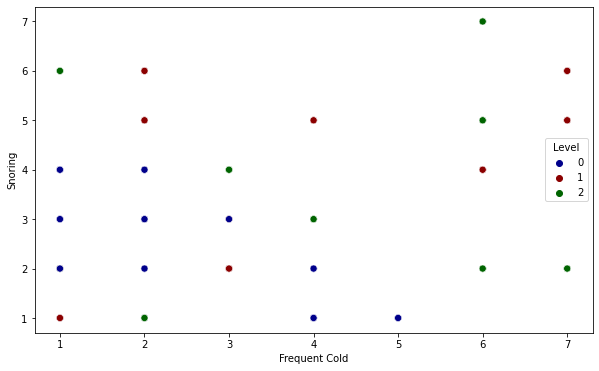

In [53]:
fig, ax=plt.subplots(figsize = (10, 6))#Required outside of function. This needs to be activated first when plotting in every code block
plot=sns.scatterplot(data=cancer_patient, 
                     x='Frequent Cold',
                     y='Snoring', 
                     hue='Level', 
                     palette=['darkblue','darkred','darkgreen'], 
                     s=50, 
                     marker='o')#Count plot
plt.savefig("/content/drive/MyDrive/PFE_IPS/Snoring_Cold.png")

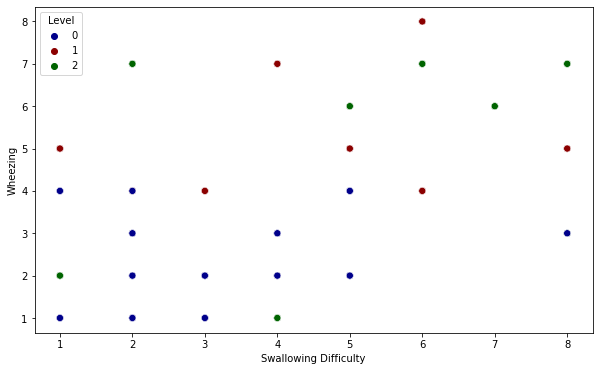

In [54]:
fig, ax=plt.subplots(figsize = (10, 6))#Required outside of function. This needs to be activated first when plotting in every code block
plot=sns.scatterplot(data=cancer_patient, 
                     x='Swallowing Difficulty',
                     y='Wheezing', 
                     hue='Level', 
                     palette=['darkblue','darkred','darkgreen'], 
                     s=50, 
                     marker='o')#Count plot
plt.savefig("/content/drive/MyDrive/PFE_IPS/Difficulty_Wheezing.png")

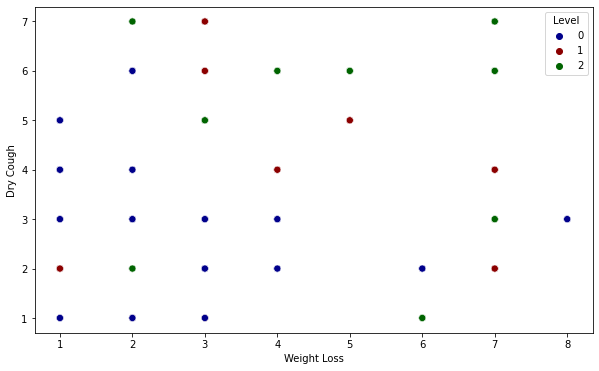

In [55]:
fig, ax=plt.subplots(figsize = (10, 6))#Required outside of function. This needs to be activated first when plotting in every code block
plot=sns.scatterplot(data=cancer_patient, 
                     x='Weight Loss',
                     y='Dry Cough', 
                     hue='Level', 
                     palette=['darkblue','darkred','darkgreen'], 
                     s=50, 
                     marker='o')#Count plot
plt.savefig("/content/drive/MyDrive/PFE_IPS/Loss_Dry.png")

## Our data is analyzed and ready for Model Training and Machine Learning

In [56]:
#cancer_patient.head()

In [57]:
cancer_patient.drop(["Patient Id"], axis = 1, inplace= True)

In [58]:
cancer_patient.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,3,1,2,3,4,0
1,17,1,3,1,5,3,4,2,2,2,2,4,2,3,1,3,7,8,6,2,1,7,2,1
2,35,1,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2,2
3,37,1,7,7,7,7,6,7,7,7,7,7,7,8,4,2,3,1,4,5,6,7,5,2
4,46,1,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3,2


### Fitting the model/algorithm and use it to make predictions on our data.

#### First we use Support Vector Machine Estimator

In [59]:
from sklearn import svm
from sklearn.model_selection import train_test_split

X = cancer_patient.drop(["Level"], axis = 1)
y = cancer_patient["Level"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

sv = svm.SVC()
sv.fit(X_train, y_train)
sv.score(X_test, y_test)

0.98

In [60]:
y_preds = sv.predict(X_test)
y_preds[:10]

array([2, 2, 1, 1, 1, 1, 2, 1, 1, 2])

In [61]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        50
           1       0.96      0.99      0.98        80
           2       0.99      1.00      0.99        70

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



In [62]:
d = {'pred':y_preds, 'true': y_test}
pred_class_svm = pd.DataFrame(d)
cas_svm=pred_class_svm[['pred', 'true']]

In [63]:
confusion_matrix(y_test, y_preds)

array([[47,  3,  0],
       [ 0, 79,  1],
       [ 0,  0, 70]])

In [64]:
accuracy_score(y_test, y_preds)

0.98

#### KNN

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X = cancer_patient.drop(["Level"], axis = 1)
y = cancer_patient["Level"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

1.0

In [66]:
"""from sklearn.neighbors import KNeighborsRegressor
X = cancer_patient.drop(["Level"], axis = 1)
y = cancer_patient["Level"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)"""

'from sklearn.neighbors import KNeighborsRegressor\nX = cancer_patient.drop(["Level"], axis = 1)\ny = cancer_patient["Level"]\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)\n\nknn = KNeighborsRegressor()\nknn.fit(X_train, y_train)\nknn.score(X_test, y_test)'

In [67]:
y_preds_knn = knn.predict(X_test)

In [68]:
print(classification_report(y_test, y_preds_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00        70
           2       1.00      1.00      1.00        68

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [69]:
d = {'pred':y_preds_knn, 'true': y_test}
pred_class_knn = pd.DataFrame(d)
cas_knn=pred_class_knn[['pred', 'true']]

**So the result from KNeighborClassifier has increaed and we can clearly see the change**

#### Lastly we use RandomForestClassifier

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = cancer_patient.drop(["Level"], axis = 1)
y = cancer_patient["Level"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

rfr = RandomForestClassifier()
rfr.fit(X_train, y_train)
rfr.score(X_test, y_test)

1.0

In [71]:
y_preds_rfr = rfr.predict(X_test)

In [72]:
print(classification_report(y_test, y_preds_rfr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        73
           2       1.00      1.00      1.00        68

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [73]:
d = {'pred':y_preds_rfr, 'true': y_test}
pred_class_rfr = pd.DataFrame(d)
cas_rfr=pred_class_rfr[['pred', 'true']]

#### Logistique Regression

In [74]:
from sklearn.linear_model import LogisticRegression

#logit = LogisticRegression(max_iter=100)
#logit.fit(X_train, y_train)
# predict class
#y_pred = logit.predict(X_test)

# predict probabilities
#y_pred_proba = logit.predict_proba(X_test)
#print(classification_report(y_test, y_pred))

In [75]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
# predict
yhat_test1 = LR.predict(X_test)

In [76]:
yhat1_prob = LR.predict_proba(X_test)

In [77]:
mylist = []
ac_train = accuracy_score(y_train, y_train)
ac_test = accuracy_score(y_test, yhat_test1)
mylist.append(ac_train)
mylist.append(ac_test)
print('Accuracy training:', np.round(ac_train,3))
print('Accuracy testing:', np.round(ac_test,3))

Accuracy training: 1.0
Accuracy testing: 0.92


In [78]:
eva=classification_report(y_test, yhat_test1)
print(eva)

              precision    recall  f1-score   support

           0       0.94      0.86      0.90        59
           1       0.92      0.89      0.90        73
           2       0.91      1.00      0.95        68

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200



In [79]:
d = {'pred':yhat_test1, 'true': y_test}
pred_class_LR  = pd.DataFrame(d)
cas_log_reg=pred_class_LR[['pred', 'true']]

## comparison 





In [80]:
from sklearn.metrics import f1_score
print('f1score')
svm_f1_score=f1_score(cas_svm.true, cas_svm.pred, average='weighted')*100

knn_f1_score=f1_score(cas_knn.true, cas_knn.pred, average='weighted')*100
rf_f1_score=f1_score(cas_rfr.true, cas_rfr.pred, average='weighted')*100
lg_f1_score=f1_score(cas_log_reg.true, cas_log_reg.pred, average='weighted')*100
#####micro
svm_f1_score_mi=f1_score(cas_svm.true, cas_svm.pred, average='micro')*100

knn_f1_score_mi=f1_score(cas_knn.true, cas_knn.pred, average='micro')*100
rf_f1_score_mi=f1_score(cas_rfr.true, cas_rfr.pred, average='micro')*100
lg_f1_score_mi=f1_score(cas_log_reg.true, cas_log_reg.pred, average='micro')*100
######macro
svm_f1_score_ma=f1_score(cas_svm.true, cas_svm.pred, average='macro')*100

knn_f1_score_ma=f1_score(cas_knn.true, cas_knn.pred, average='macro')*100
rf_f1_score_ma=f1_score(cas_rfr.true, cas_rfr.pred, average='macro')*100
lg_f1_score_ma=f1_score(cas_log_reg.true, cas_log_reg.pred, average='macro')*100
print(svm_f1_score)

print(knn_f1_score)
print(rf_f1_score)
print(lg_f1_score)
print(svm_f1_score_mi)
print('accuracy')
from sklearn.metrics import accuracy_score
svm_accuracy_score=accuracy_score(cas_svm.true, cas_svm.pred)*100

knn_accuracy_score=accuracy_score(cas_knn.true, cas_knn.pred)*100
rf_accuracy_score=accuracy_score(cas_rfr.true, cas_rfr.pred)*100
lg_accuracy_score=accuracy_score(cas_log_reg.true, cas_log_reg.pred)*100
print(svm_accuracy_score)

print(knn_accuracy_score)
print(rf_accuracy_score)
print(lg_accuracy_score)


f1score
97.99092285236907
100.0
100.0
91.91537180862402
98.0
accuracy
98.0
100.0
100.0
92.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



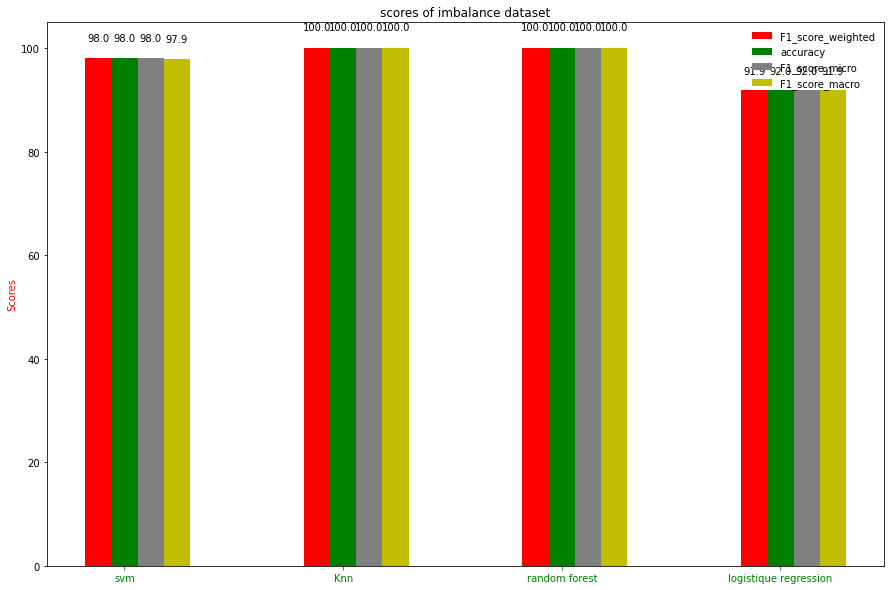

In [81]:
N = 4
ind = np.arange(N)  # the x locations for the groups
width = 0.12   # the width of the bars

fig = plt.figure(figsize=(15,10))
plt.title('scores of imbalance dataset')
ax = fig.add_subplot(111)


yvals = [svm_f1_score, knn_f1_score,rf_f1_score,lg_f1_score]
rects1 = ax.bar(ind, yvals, width, color='r')

zvals = [svm_accuracy_score,  knn_accuracy_score,rf_accuracy_score,lg_accuracy_score]
rects2 = ax.bar(ind+width, zvals, width, color='g')


#rects3 = ax.bar(ind+width+width, kvals, width, color='lightgray')
rvals = [svm_f1_score_mi, knn_f1_score_mi,rf_f1_score_mi,lg_f1_score_mi]
rects4 = ax.bar(ind+width+width, rvals, width, color='gray')
lvals = [svm_f1_score_ma, knn_f1_score_ma,rf_f1_score_ma,lg_f1_score_ma]
rects5 = ax.bar(ind+width+width+width, lvals, width, color='y')

ax.set_ylabel('Scores').set_color('red')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('svm', 'Knn', 'random forest', 'logistique regression') )
ax.tick_params(axis='x', colors='green')

ax.legend( (rects1[0], rects2[0],rects4[0],rects5[0]), ('F1_score_weighted', 'accuracy','F1_score_micro','F1_score_macro'),frameon=False, loc='upper right' )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%0.1f'%float(h),
                ha='center', va='top')

autolabel(rects1)
autolabel(rects2)
#autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
plt.savefig("/content/drive/MyDrive/PFE_IPS/comparison.png")
plt.show()

**Cross val for all the above algorithms to make sure for scores accuracy**

In [82]:
from sklearn.model_selection import cross_val_score

crossVal_sv = cross_val_score(sv, X, y)
crossVal_knn = cross_val_score(knn, X, y)
crossVal_rfr = cross_val_score(rfr, X, y)
#crossval_Lgr= cross_val_score(model_log,X,y)

print(f"For SupportVectorMachine: {crossVal_sv}, \nFor KNeighborClassifier: {crossVal_knn}, \nFor RandomForestRegressor: {crossVal_rfr}")

For SupportVectorMachine: [0.98  0.975 0.985 0.97  0.97 ], 
For KNeighborClassifier: [0.995 1.    1.    1.    0.995], 
For RandomForestRegressor: [1. 1. 1. 1. 1.]
